In [1]:
##################################################################
# # ! Juno Magnetic Modelling using <Vector Potential> with <3 NNs>
# Plot showing the RMS errors of 'SH models' & `PINN Models` 
# computed at each perijove orbit of ***Juno Observation Orbits***
##################################################################
# %%
# # ! Setup
import numpy as np;
import matplotlib.pyplot as plt
from LW_DataReadWrite import *;

In [2]:
# # ! RMS of PINN Models Estimations of |B| at <Obs>: at individual orbit
# TODO ******************** Parameters ******************** #
cstRj=71492;      # Jupiter radius in km
GS2nT=1e5;        # Gauss to nt
# TODO ********************** end ************************* #
fileObs='input/RawJuno_PJ01_33_4.0Rj.txt';
nObs,PJ,Year,DD,xObs,yObs,zObs,bxObs,byObs,bzObs = LoadObsFile(fileObs,showinfo=False);
RObs=np.sqrt(xObs**2+yObs**2+zObs**2); 
RinRj=RObs/cstRj;
bNormObs = np.sqrt(bxObs**2 + byObs**2 + bzObs**2);
FILEs = ['output/JRM33_I30E1_nmax18_EstBxyz_RawObs33.txt',\
         'output/JRM33_I30E1_nmax30_EstBxyz_RawObs33.txt',\
         'output/Bloxham_I32E1_nmax18_EstBxyz_RawObs33.txt',\
         'output/Bloxham_I32E1_nmax32_EstBxyz_RawObs33.txt',\
         'output/JUNO_PINN_VP3_PJ01_33_4.0Rj_NN06_040_swish_Adam_DW1_RADk1c0n3000d600_nEpo0012000_BS0010000_Seed12345_EstBxyz_RawObs33.txt',\
         'output/JUNO_PINN_VP3_PJ01_50_4.0Rj_NN06_040_swish_Adam_DW1_RADk1c0n3000d600_nEpo0012000_BS0010000_Seed12345_EstBxyz_RawObs33.txt',];
MODELs = ['JRM33 (n=18)','JRM33 (n=30)','Baseline (n=18)','Baseline (n=32)','PINN33e','PINN50e'];

nMODEL = len(MODELs); 
pjs = np.unique(PJ); npj = pjs.size;
RMS = [[] for i in range(nMODEL)]; # RMS on each orbit
E2 = [[] for i in range(nMODEL)];  # E2 error (L2 norm relative error %) on each orbit
ERRORs = [[] for i in range(nMODEL)];
for iMODEL in range(nMODEL):
     modelName = MODELs[iMODEL];
     fileEst = FILEs[iMODEL];
     dataEst=np.loadtxt(fileEst,skiprows=1);
     estBx=dataEst[:,6:7]; estBy=dataEst[:,7:8]; estBz=dataEst[:,8:9];
     estBNorm=np.sqrt(estBx**2+estBy**2+estBz**2);
     print('\n*********************\n',flush=True);
     print('RMS of %s evaluated at Juno <OBS>:'%(modelName),flush=True);
     for ipj in range(npj):
          curpj = pjs[ipj];
          pkInd = np.logical_and((PJ==curpj),(RinRj<=4.0));
          refBx_pj = bxObs[pkInd]; refBy_pj = byObs[pkInd]; refBz_pj = bzObs[pkInd];
          refBNorm_pj = bNormObs[pkInd];
          estBx_pj = estBx[pkInd]; estBy_pj = estBy[pkInd]; estBz_pj = estBz[pkInd];
          estBNorm_pj = estBNorm[pkInd];
          # Delta |B|
          errBNorm1 = estBNorm_pj - refBNorm_pj;
          # |Delta B|
          errBNorm2 = np.sqrt((estBx_pj-refBx_pj)**2+(estBy_pj-refBy_pj)**2+(estBz_pj-refBz_pj)**2);
          print('PJ[%02d], NOB: %4d, '%(curpj,np.count_nonzero(pkInd)),end='',flush=True);
          rms = np.sqrt(np.mean(errBNorm1**2));
          e2 = rms/np.sqrt(np.mean(refBNorm_pj**2));
          print('rms = %8.1f nT; E2 = %8.4f %%'%(GS2nT*rms,100*e2),flush=True);
          RMS[iMODEL].append(GS2nT*rms);
          E2[iMODEL].append(100*e2);
          ERRORs[iMODEL].append(GS2nT*errBNorm1);
     print('',flush=True); # <br>


*********************

RMS of JRM33 (n=18) evaluated at Juno <OBS>:
PJ[01], NOB: 17035, rms =   1690.9 nT; E2 =   0.7405 %
PJ[03], NOB: 17037, rms =    413.0 nT; E2 =   0.2741 %
PJ[04], NOB: 17043, rms =    447.7 nT; E2 =   0.2960 %
PJ[05], NOB: 17005, rms =    974.4 nT; E2 =   0.3943 %
PJ[06], NOB: 17007, rms =    762.5 nT; E2 =   0.2911 %
PJ[07], NOB: 17008, rms =    668.8 nT; E2 =   0.4094 %
PJ[08], NOB: 17006, rms =    618.9 nT; E2 =   0.3589 %
PJ[09], NOB: 17026, rms =    631.4 nT; E2 =   0.3477 %
PJ[10], NOB: 17038, rms =    557.4 nT; E2 =   0.3526 %
PJ[11], NOB: 16963, rms =    668.2 nT; E2 =   0.3016 %
PJ[12], NOB: 17002, rms =    959.3 nT; E2 =   0.4259 %
PJ[13], NOB: 17004, rms =    494.0 nT; E2 =   0.3314 %
PJ[14], NOB: 16935, rms =   1343.9 nT; E2 =   0.6136 %
PJ[15], NOB: 16952, rms =    627.1 nT; E2 =   0.3516 %
PJ[16], NOB: 16997, rms =    655.3 nT; E2 =   0.3686 %
PJ[17], NOB: 17057, rms =    555.9 nT; E2 =   0.1993 %
PJ[18], NOB: 16993, rms =    811.2 nT; E2 =   0.423

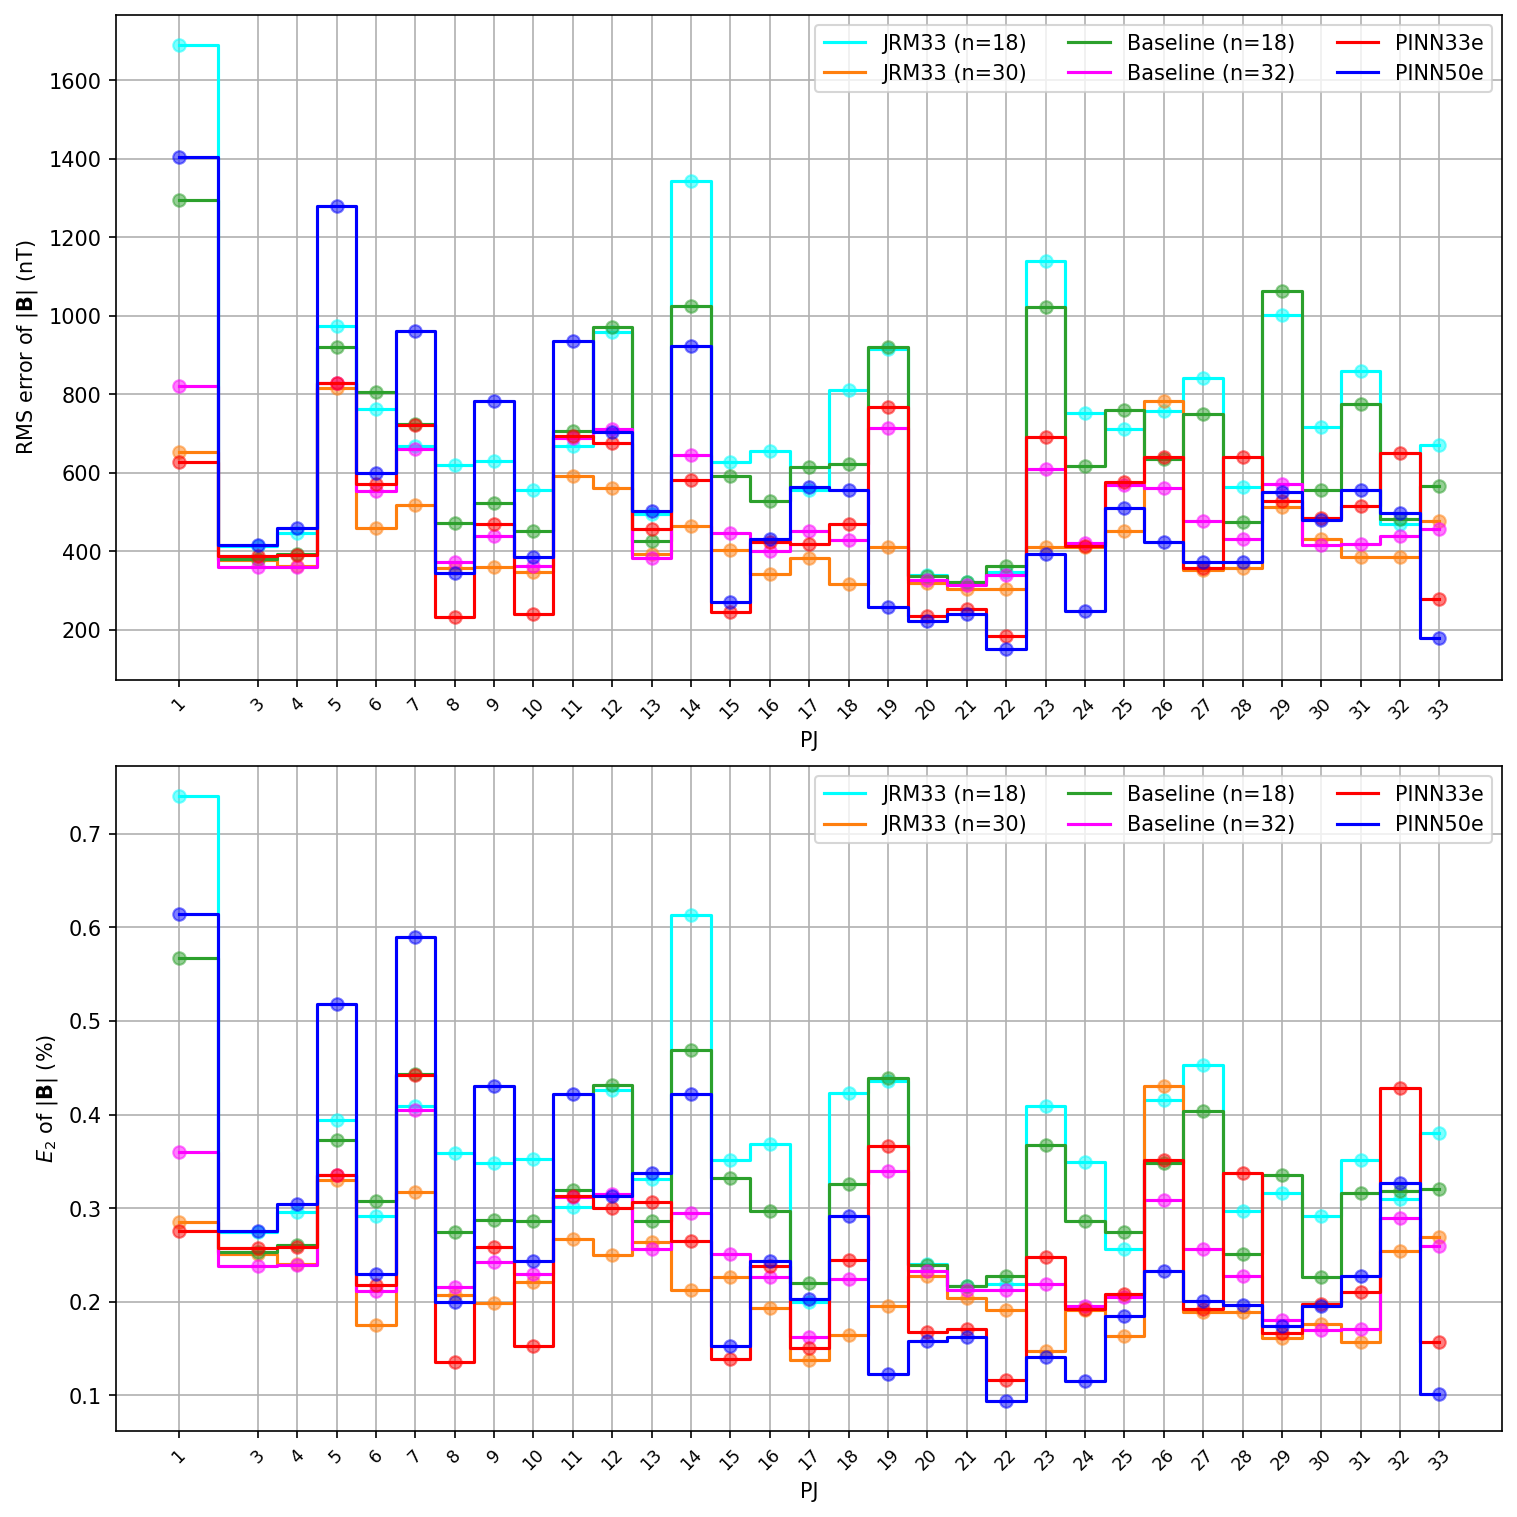

In [3]:
# # ! Plot of PINN Models Estimations Error of |B| at <Obs>: at individual orbit
fig, axs = plt.subplots(nrows=2, ncols=1, figsize=(10, 10), dpi=150, layout='constrained');
yLables=['RMS error of $|\mathbf{B}|$ (nT)','$E_2$ of $|\mathbf{B}|$ (%)'];
COLORs =['#00FFFF','C1','C2','#FF00FF','#FF0000','#0000FF'];
LSs = ['-','-','-','-','-','-'];
MARKERs =['o','o','o','o','o','o'];
for iMODEL in range(nMODEL):
     modelName = MODELs[iMODEL];
     axs[0].step(pjs,RMS[iMODEL],color=COLORs[iMODEL],linestyle=LSs[iMODEL],where='mid',label=modelName);
     axs[0].plot(pjs,RMS[iMODEL], MARKERs[iMODEL], color=COLORs[iMODEL],linestyle='',alpha=0.5);
     axs[1].step(pjs,E2[iMODEL], color=COLORs[iMODEL],linestyle=LSs[iMODEL],where='mid',label=modelName);
     axs[1].plot(pjs,E2[iMODEL],  MARKERs[iMODEL], color=COLORs[iMODEL],linestyle='',alpha=0.5);
for iax in range(len(axs)):
     axs[iax].set_xticks(pjs);
     axs[iax].xaxis.grid(True);
     axs[iax].yaxis.grid(True);
     axs[iax].set_xlabel('PJ');
     axs[iax].set_ylabel(yLables[iax]);
     axs[iax].legend(loc='best', ncol = 3)  # Add a legend
     axs[iax].tick_params(axis='x',which='major',labelrotation=45,labelsize='small');
plt.savefig('Plot_DataMissfit_SHs_vs_PINNs_RawObs33.png',dpi=300);
plt.show();